# 선형회귀 (자치구별, 직전 분기)

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. 데이터 불러오기

In [76]:
# 불필요한 column 제거

df = df.drop(df.columns[4:1500], axis = 1)
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
df.head()

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,시군구_코드,자치구_명
0,2020.0,2.0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177,1001496,11680,강남구
1,2020.0,2.0,3026454.0,22.00,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257,1001495,11710,송파구
2,2020.0,2.0,4033679.0,5.00,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362,1001494,11110,종로구
3,2020.0,2.0,3262023.0,8.00,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308,1001493,11140,중구
4,2020.0,2.0,3764785.0,14.48,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080,1001492,11140,중구


In [77]:
# 결측치 확인

df.isnull().sum()

기준_년_코드      0
기준_분기_코드     0
총_유동인구_수     0
아파트_단지_수     0
아파트_평균_면적    0
아파트_평균_시가    0
총 상주인구 수     0
집객시설_수       0
당월_매출_금액     0
총_직장_인구_수    0
폐업률          0
상권_코드        0
시군구_코드       0
자치구_명        0
dtype: int64

In [78]:
# (rows, columns)

df.shape

(32912, 14)

## 2. 데이터 전처리
### (1) 데이터 정규화

In [79]:
# Min-Max 정규화

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

for i in range(2,10):
    x = df[df.columns[i]].values
    x_scaled = min_max_scaler.fit_transform(pd.DataFrame(x))

    # min_Max 적용
    df[df.columns[i]] = pd.DataFrame(x_scaled)

In [80]:
# 결과 확인

df.head()

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,시군구_코드,자치구_명
0,2020.0,2.0,0.009227,0.028620,0.286667,0.123935,0.001466,0.086149,0.257041,0.090966,2.587177,1001496,11680,강남구
1,2020.0,2.0,0.308615,0.044586,0.310105,0.222086,0.502015,0.407095,0.237704,0.139421,3.026257,1001495,11710,송파구
2,2020.0,2.0,0.411326,0.008493,0.135889,0.047209,0.117489,0.550676,0.398546,0.188385,2.081362,1001494,11110,종로구
3,2020.0,2.0,0.332637,0.014862,0.184669,0.100217,0.148205,0.277027,0.379175,0.034624,2.107308,1001493,11140,중구
4,2020.0,2.0,0.383906,0.028620,0.286667,0.123935,0.067416,1.000000,0.579005,0.599629,2.163080,1001492,11140,중구


### (2) 데이터 분할 및 결합

In [216]:
# 데이터 분할

X = df.drop(['폐업률', '시군구_코드'], axis = 1).reset_index(drop=True)
Y = df[['기준_년_코드', '기준_분기_코드', '상권_코드', '자치구_명', '폐업률']].reset_index(drop=True)

In [217]:
# X와 Y의 시점 맞추기

for i in range(Y.shape[0]):
    if Y.loc[i,'기준_분기_코드'] == 1:
        Y.loc[i,'기준_년_코드'] -= 1
        Y.loc[i,'기준_분기_코드'] = 4
    else:
        Y.loc[i,'기준_분기_코드'] -= 1
        

In [218]:
# 결과 확인

X

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,상권_코드,자치구_명
0,2020.0,2.0,0.009227,0.028620,0.286667,0.123935,0.001466,0.086149,0.257041,0.090966,1001496,강남구
1,2020.0,2.0,0.308615,0.044586,0.310105,0.222086,0.502015,0.407095,0.237704,0.139421,1001495,송파구
2,2020.0,2.0,0.411326,0.008493,0.135889,0.047209,0.117489,0.550676,0.398546,0.188385,1001494,종로구
3,2020.0,2.0,0.332637,0.014862,0.184669,0.100217,0.148205,0.277027,0.379175,0.034624,1001493,중구
4,2020.0,2.0,0.383906,0.028620,0.286667,0.123935,0.067416,1.000000,0.579005,0.599629,1001492,중구
...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.0,2.0,0.004569,0.000000,0.170732,0.029937,0.006595,0.062106,0.001331,0.002786,1001443,동작구
32908,2020.0,2.0,0.006929,0.028620,0.286667,0.123935,0.000916,0.001689,0.004277,0.002484,1001456,관악구
32909,2020.0,2.0,0.027591,0.028620,0.286667,0.123935,0.009893,0.001689,0.007098,0.002513,1001464,관악구
32910,2020.0,2.0,0.005793,0.028620,0.286667,0.123935,0.003175,0.001689,0.004036,0.002503,1001465,관악구


In [219]:
# 결과 확인

Y

,기준_년_코드,기준_분기_코드,상권_코드,자치구_명,폐업률
0,2020.0,1.0,1001496,강남구,2.587177
1,2020.0,1.0,1001495,송파구,3.026257
2,2020.0,1.0,1001494,종로구,2.081362
3,2020.0,1.0,1001493,중구,2.107308
4,2020.0,1.0,1001492,중구,2.163080
...,...,...,...,...,...
32907,2020.0,1.0,1001443,동작구,5.555556
32908,2020.0,1.0,1001456,관악구,0.000000
32909,2020.0,1.0,1001464,관악구,1.492537
32910,2020.0,1.0,1001465,관악구,0.000000


In [220]:
# y_test 분할

y_test = Y[Y['기준_년_코드'] == 2020]
y_test = y_test[y_test['기준_분기_코드'] == 1].reset_index(drop = True)
                
# y_train 분할 
                
y_train = Y.copy()

for i in range(y_train.shape[0]):
    if y_train.loc[i,'기준_년_코드'] == 2020 and y_train.loc[i,'기준_분기_코드'] == 1:
        y_train = y_train.drop(i)
    elif y_train.loc[i,'기준_년_코드'] == 2014 and y_train.loc[i,'기준_분기_코드'] == 4:
        y_train = y_train.drop(i)
    else : continue
y_train = y_train.reset_index(drop = True)

In [221]:
# 결과 확인

y_test

,기준_년_코드,기준_분기_코드,상권_코드,자치구_명,폐업률
0,2020.0,1.0,1001496,강남구,2.587177
1,2020.0,1.0,1001495,송파구,3.026257
2,2020.0,1.0,1001494,종로구,2.081362
3,2020.0,1.0,1001493,중구,2.107308
4,2020.0,1.0,1001492,중구,2.163080
...,...,...,...,...,...
1491,2020.0,1.0,1001443,동작구,5.555556
1492,2020.0,1.0,1001456,관악구,0.000000
1493,2020.0,1.0,1001464,관악구,1.492537
1494,2020.0,1.0,1001465,관악구,0.000000


In [222]:
# 결과 확인

y_train

,기준_년_코드,기준_분기_코드,상권_코드,자치구_명,폐업률
0,2019.0,4.0,1001496,강남구,3.638368
1,2019.0,4.0,1001495,송파구,3.604806
2,2019.0,4.0,1001494,종로구,2.667423
3,2019.0,4.0,1001493,중구,3.716515
4,2019.0,4.0,1001492,중구,2.293681
...,...,...,...,...,...
29915,2019.0,4.0,1001443,동작구,5.555556
29916,2019.0,4.0,1001456,관악구,0.000000
29917,2019.0,4.0,1001464,관악구,7.936508
29918,2019.0,4.0,1001465,관악구,0.000000


In [223]:
# X_test 분할

X_unknown = X[X['기준_년_코드'] == 2020]
X_unknown = X_unknown[X_unknown['기준_분기_코드'] == 2].reset_index(drop = True)

X_test = X[X['기준_년_코드'] == 2020]
X_test = X_test[X_test['기준_분기_코드'] == 1].reset_index(drop = True)

# X_train 분할 
                
X_train = X.copy()

for i in range(X_train.shape[0]):
    if X_train.loc[i,'기준_년_코드'] == 2020:
        X_train = X_train.drop(i)
    else : continue
X_train = X_train.reset_index(drop = True)

In [224]:
# 결과 확인

X_test

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,상권_코드,자치구_명
0,2020.0,1.0,0.009968,0.016985,0.342485,0.212759,0.001466,0.086149,0.240494,0.090966,1001496,강남구
1,2020.0,1.0,0.312701,0.044586,0.310105,0.222086,0.502015,0.407095,0.217130,0.139421,1001495,송파구
2,2020.0,1.0,0.413986,0.008493,0.135889,0.047209,0.117489,0.550676,0.361417,0.188385,1001494,종로구
3,2020.0,1.0,0.328866,0.014862,0.184669,0.100217,0.148205,0.277027,0.340792,0.034624,1001493,중구
4,2020.0,1.0,0.422504,0.016985,0.342485,0.212759,0.067416,1.000000,0.552013,0.599629,1001492,중구
...,...,...,...,...,...,...,...,...,...,...,...,...
1491,2020.0,1.0,0.006186,0.000000,0.170732,0.029937,0.006595,0.052095,0.001197,0.020493,1001443,동작구
1492,2020.0,1.0,0.007245,0.016985,0.342485,0.212759,0.000916,0.001689,0.004572,0.021591,1001456,관악구
1493,2020.0,1.0,0.027522,0.016985,0.342485,0.212759,0.009893,0.001689,0.006542,0.021589,1001464,관악구
1494,2020.0,1.0,0.005851,0.016985,0.342485,0.212759,0.003175,0.001689,0.003787,0.021590,1001465,관악구


In [225]:
# 결과 확인

X_train

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,상권_코드,자치구_명
0,2019.0,4.0,0.013301,0.048450,0.243740,0.090077,0.001466,0.086149,0.343061,0.090966,1001496,강남구
1,2019.0,4.0,0.328918,0.040340,0.306620,0.181772,0.502015,0.407095,0.284775,0.139421,1001495,송파구
2,2019.0,4.0,0.501501,0.014862,0.135889,0.043658,0.117489,0.550676,0.464221,0.188385,1001494,종로구
3,2019.0,4.0,0.395165,0.010616,0.240418,0.060662,0.148205,0.277027,0.538559,0.034624,1001493,중구
4,2019.0,4.0,0.538267,0.048450,0.243740,0.090077,0.067416,1.000000,0.798444,0.599629,1001492,중구
...,...,...,...,...,...,...,...,...,...,...,...,...
29915,2019.0,4.0,0.006921,0.000000,0.170732,0.022483,0.006595,0.017703,0.001578,0.002369,1001443,동작구
29916,2019.0,4.0,0.006441,0.048450,0.243740,0.090077,0.000916,0.001689,0.004371,0.002249,1001456,관악구
29917,2019.0,4.0,0.027208,0.048450,0.243740,0.090077,0.009893,0.001689,0.006448,0.002265,1001464,관악구
29918,2019.0,4.0,0.005758,0.048450,0.243740,0.090077,0.003175,0.001689,0.003179,0.002261,1001465,관악구


In [226]:
# 재결합

Xy_train = pd.merge(X_train, y_train, how ='left', on = ['기준_년_코드', '기준_분기_코드', '상권_코드', '자치구_명'])
Xy_test = pd.merge(X_test, y_test, how = 'left', on = ['기준_년_코드', '기준_분기_코드', '상권_코드', '자치구_명'])

In [227]:
# 결과 확인

Xy_train.isnull().sum()

기준_년_코드      0
기준_분기_코드     0
총_유동인구_수     0
아파트_단지_수     0
아파트_평균_면적    0
아파트_평균_시가    0
총 상주인구 수     0
집객시설_수       0
당월_매출_금액     0
총_직장_인구_수    0
상권_코드        0
자치구_명        0
폐업률          0
dtype: int64

In [228]:
# 결과 확인

Xy_test.isnull().sum()

기준_년_코드      0
기준_분기_코드     0
총_유동인구_수     0
아파트_단지_수     0
아파트_평균_면적    0
아파트_평균_시가    0
총 상주인구 수     0
집객시설_수       0
당월_매출_금액     0
총_직장_인구_수    0
상권_코드        0
자치구_명        0
폐업률          0
dtype: int64

In [229]:
# 자치구별로 분할

name_list = list(df['자치구_명'].unique())

for i in range(1, 26):
    globals()['Xy_train_{}'.format(i)] = Xy_train[Xy_train['자치구_명'] == name_list[i-1]]
    globals()['Xy_test_{}'.format(i)] = Xy_test[Xy_test['자치구_명'] == name_list[i-1]]

In [420]:
# 결과 확인

Xy_train_1

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,상권_코드,자치구_명,폐업률
0,2019.0,4.0,0.013301,0.048450,0.243740,0.090077,0.001466,0.086149,0.343061,0.090966,1001496,강남구,3.638368
20,2019.0,4.0,0.004195,0.048450,0.243740,0.090077,0.000427,0.005068,0.004986,0.000784,1001475,강남구,2.941176
21,2019.0,4.0,0.028241,0.002123,0.233449,0.197876,0.014717,0.010135,0.017159,0.000320,1001474,강남구,2.803738
22,2019.0,4.0,0.007007,0.000000,0.564460,0.659501,0.010442,0.003378,0.003465,0.000269,1001473,강남구,2.298851
23,2019.0,4.0,0.005014,0.004246,0.400697,0.175840,0.005191,0.017703,0.008568,0.000480,1001472,강남구,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29779,2018.0,4.0,0.007084,0.002123,0.296167,0.175817,0.018503,0.010135,0.031301,0.003722,1001069,강남구,3.225806
29784,2018.0,4.0,0.010903,0.004246,0.156794,0.114881,0.015572,0.003378,0.010281,0.003800,1001128,강남구,2.531646
29883,2018.0,4.0,0.007583,0.000000,0.331010,0.125714,0.017526,0.027331,0.005405,0.003720,1001470,강남구,2.040816
29884,2018.0,4.0,0.002425,0.004246,0.400697,0.175840,0.005191,0.027703,0.000092,0.003790,1001472,강남구,0.000000


In [421]:
# 결과 확인

Xy_train_1

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,상권_코드,자치구_명,폐업률
0,2019.0,4.0,0.013301,0.048450,0.243740,0.090077,0.001466,0.086149,0.343061,0.090966,1001496,강남구,3.638368
20,2019.0,4.0,0.004195,0.048450,0.243740,0.090077,0.000427,0.005068,0.004986,0.000784,1001475,강남구,2.941176
21,2019.0,4.0,0.028241,0.002123,0.233449,0.197876,0.014717,0.010135,0.017159,0.000320,1001474,강남구,2.803738
22,2019.0,4.0,0.007007,0.000000,0.564460,0.659501,0.010442,0.003378,0.003465,0.000269,1001473,강남구,2.298851
23,2019.0,4.0,0.005014,0.004246,0.400697,0.175840,0.005191,0.017703,0.008568,0.000480,1001472,강남구,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29779,2018.0,4.0,0.007084,0.002123,0.296167,0.175817,0.018503,0.010135,0.031301,0.003722,1001069,강남구,3.225806
29784,2018.0,4.0,0.010903,0.004246,0.156794,0.114881,0.015572,0.003378,0.010281,0.003800,1001128,강남구,2.531646
29883,2018.0,4.0,0.007583,0.000000,0.331010,0.125714,0.017526,0.027331,0.005405,0.003720,1001470,강남구,2.040816
29884,2018.0,4.0,0.002425,0.004246,0.400697,0.175840,0.005191,0.027703,0.000092,0.003790,1001472,강남구,0.000000


In [240]:
# 결과 확인

count1 = 0
count2 = 0

for i in range(1, 26):
    name = globals()['Xy_train_{}'.format(i)]['자치구_명'].unique()
    shape = globals()['Xy_train_{}'.format(i)].shape
    count1 += shape[0]
    print("Xy_train_{} = {}  //  {}".format(i, name, shape))
    
    name = globals()['Xy_test_{}'.format(i)]['자치구_명'].unique()
    shape = globals()['Xy_test_{}'.format(i)].shape
    count2 += shape[0]
    print("Xy_test_{} = {}  //  {}".format(i, name, shape))

print("\n\n전체 행 개수 : ", count1, count2)

Xy_train_1 = ['강남구']  //  (2300, 13)
Xy_test_1 = ['강남구']  //  (115, 13)
Xy_train_2 = ['송파구']  //  (900, 13)
Xy_test_2 = ['송파구']  //  (45, 13)
Xy_train_3 = ['종로구']  //  (1260, 13)
Xy_test_3 = ['종로구']  //  (63, 13)
Xy_train_4 = ['중구']  //  (1100, 13)
Xy_test_4 = ['중구']  //  (55, 13)
Xy_train_5 = ['용산구']  //  (1160, 13)
Xy_test_5 = ['용산구']  //  (58, 13)
Xy_train_6 = ['강동구']  //  (1200, 13)
Xy_test_6 = ['강동구']  //  (60, 13)
Xy_train_7 = ['서초구']  //  (1400, 13)
Xy_test_7 = ['서초구']  //  (70, 13)
Xy_train_8 = ['관악구']  //  (1760, 13)
Xy_test_8 = ['관악구']  //  (88, 13)
Xy_train_9 = ['동작구']  //  (1300, 13)
Xy_test_9 = ['동작구']  //  (65, 13)
Xy_train_10 = ['영등포구']  //  (1480, 13)
Xy_test_10 = ['영등포구']  //  (74, 13)
Xy_train_11 = ['금천구']  //  (820, 13)
Xy_test_11 = ['금천구']  //  (41, 13)
Xy_train_12 = ['구로구']  //  (1180, 13)
Xy_test_12 = ['구로구']  //  (59, 13)
Xy_train_13 = ['강서구']  //  (1380, 13)
Xy_test_13 = ['강서구']  //  (69, 13)
Xy_train_14 = ['양천구']  //  (1260, 13)
Xy_test_14 = ['양천구']  //  (63, 1

In [241]:
# 딕셔너리

d = {k:v for k,v in zip(df['자치구_명'].unique(), [i for i in range(1,26)])}
d

{'강남구': 1,
 '송파구': 2,
 '종로구': 3,
 '중구': 4,
 '용산구': 5,
 '강동구': 6,
 '서초구': 7,
 '관악구': 8,
 '동작구': 9,
 '영등포구': 10,
 '금천구': 11,
 '구로구': 12,
 '강서구': 13,
 '양천구': 14,
 '마포구': 15,
 '서대문구': 16,
 '은평구': 17,
 '노원구': 18,
 '도봉구': 19,
 '강북구': 20,
 '성북구': 21,
 '중랑구': 22,
 '동대문구': 23,
 '광진구': 24,
 '성동구': 25}

In [422]:
globals()['Xy_test_{}'.format(1)]

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,상권_코드,자치구_명,폐업률
0,2020.0,1.0,0.009968,0.016985,0.342485,0.212759,0.001466,0.086149,0.240494,0.090966,1001496,강남구,2.587177
20,2020.0,1.0,0.004775,0.016985,0.342485,0.212759,0.000427,0.005068,0.004789,0.000784,1001475,강남구,2.941176
21,2020.0,1.0,0.029095,0.000000,0.233449,0.269201,0.014717,0.010135,0.016139,0.000320,1001474,강남구,0.000000
22,2020.0,1.0,0.006357,0.016985,0.342485,0.212759,0.010442,0.003378,0.003157,0.000269,1001473,강남구,2.272727
23,2020.0,1.0,0.004984,0.004246,0.400697,0.215839,0.005191,0.052095,0.004689,0.000480,1001472,강남구,5.882353
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,2020.0,1.0,0.049475,0.104034,0.181185,0.101871,0.143686,0.015203,0.013101,0.003695,1000890,강남구,0.921659
588,2020.0,1.0,0.089218,0.199575,0.202091,0.117402,0.221299,0.020270,0.007122,0.005491,1000889,강남구,1.775148
589,2020.0,1.0,0.048592,0.025478,0.216028,0.189951,0.111871,0.005068,0.000823,0.008191,1000888,강남구,1.315789
590,2020.0,1.0,0.046804,0.072187,0.512195,0.320134,0.074316,0.010135,0.022665,0.028995,1000887,강남구,1.734104


## 3. 모델링

In [470]:
# 변수선택법 함수 정의

import itertools 

def processSubset(X_train, X_test, y_train, y_test, feature_set):
    model = LinearRegression()
    regr = model.fit(X_train[list(feature_set)], y_train) 
    y_pred1 = regr.predict(X_test[list(feature_set)])
    rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
    y_pred2 = regr.predict(X_train[list(feature_set)])
    rmse2 = np.sqrt(mean_squared_error(y_train, y_pred2))
    return {"model" : regr, "rmse" : rmse1, 'rmse_d' : abs(rmse1 - rmse2), "features" : feature_set}

def getBest(X_train, X_test, y_train, y_test, k):
    results = []
    for combo in itertools.combinations(X_train.columns, k) :
        
        combo = (list(combo))  
        results.append(processSubset(X_train, X_test, y_train, y_test, feature_set = combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['rmse'].argmin()]
    
    return best_model

In [471]:
# 데이터 분할 함수 정의
# 위에 정의한 딕셔너리에 따라 자치구 명에 따른 train, test 데이터 반환

def split(name):
    n = d[name]
    Xy_tr = globals()['Xy_train_{}'.format(n)]
    Xy_te = globals()['Xy_test_{}'.format(n)]
    X_train = Xy_tr.drop(['폐업률', '자치구_명', '상권_코드', '기준_년_코드', '기준_분기_코드'], axis = 1)
    y_train = Xy_tr['폐업률']
    X_test = Xy_te.drop(['폐업률', '자치구_명', '상권_코드', '기준_년_코드', '기준_분기_코드'], axis = 1)
    y_test = Xy_te['폐업률']
    
    
    return(X_train, X_test, y_train, y_test)

# 모델 생성 함수 정의
# RMSE가 가장 낮도록 변수를 자동 선택

def model(name):
    n = d[name]
    X_train, X_test, y_train, y_test = split(name)
    re_list = []
    a = 0
    for k in range(1,9):
        re = getBest(X_train, X_test, y_train, y_test, k)
        re_list.append(re)
        k = [i for i in range(k)]
        model_df = pd.DataFrame(re_list, k)
        m = model_df.loc[model_df['rmse'].argmin()]['model']
        r = model_df.loc[model_df['rmse'].argmin()]['rmse']
        f = model_df.loc[model_df['rmse'].argmin()]['features']
        di = model_df.loc[model_df['rmse'].argmin()]['rmse_d']
    return (m,r,f,di)

In [472]:
i = 0
for name in df['자치구_명'].unique():
    i+=1
    (m,r,f,di) = model(name)
    globals()['model_{}'.format(i)] = m
    globals()['rmse_{}'.format(i)] = r
    globals()['features_{}'.format(i)] = f
    
    print("{} : {}\nrmse : {}\nfeatures : {}\nd : {}\n\n".format(name,m,r,f,di))

강남구 : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
rmse : 1.749545091506457
features : ['총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가', '총 상주인구 수', '당월_매출_금액']
d : 0.0031329479443749086


송파구 : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
rmse : 1.3664846393608145
features : ['총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가', '총 상주인구 수', '집객시설_수', '당월_매출_금액']
d : 0.32364206855593536


종로구 : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
rmse : 1.7326361167651474
features : ['총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가', '총 상주인구 수']
d : 0.32448899374161644


중구 : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
rmse : 1.5589894292868478
features : ['총_유동인구_수', '아파트_평균_면적', '총 상주인구 수', '당월_매출_금액']
d : 0.0799496816262657


용산구 : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
rmse : 2.387921736311986
features : ['총_유동인구_수

## 4. 변수 중요도

- 선형회귀에서는 각 독립변수의 weight가 각 변수의 중요도가 된다.

In [473]:
# 각 모델의 회귀 계수를 수집 (절대값)

for i in range(1,26):
    w = list(globals()['model_{}'.format(i)].coef_)
    wl = [abs(i) for i in w]
    globals()['weight_{}'.format(i)] = wl

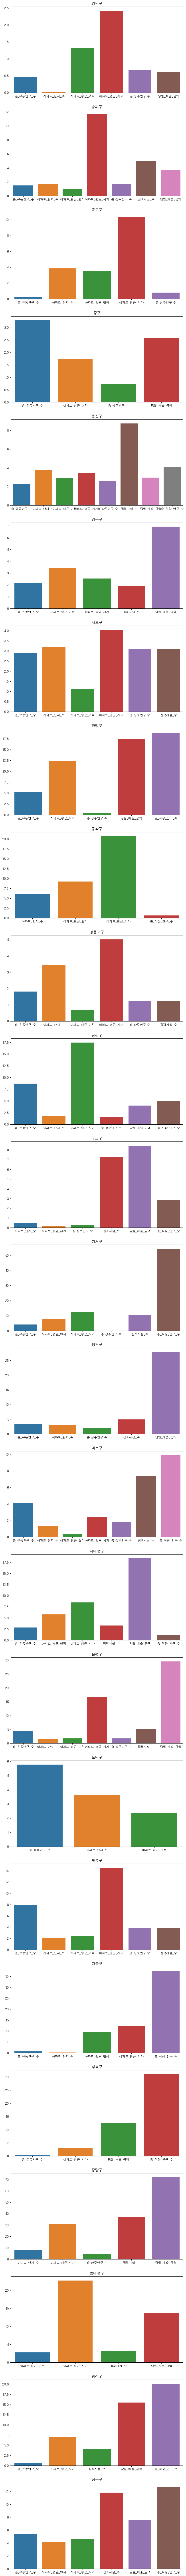

In [474]:
# 막대그래프로 중요도 시각화

plt.rcdefaults()
plt.rcParams["font.family"] = 'Haansoft Dotum'
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(nrows=25, figsize=(10,150))
for i in range(1,26):
    ax[i-1].set_title(name_list[i-1])
    sns.barplot(list(globals()['features_{}'.format(i)]), globals()['weight_{}'.format(i)], ax = ax[i-1])

### 5. 예측 정확도
- lineplot으로 예측 정확도 시각화

In [475]:
i = 0
for name in df['자치구_명'].unique():
    i+=1
    x, globals()['X_test_{}'.format(i)], y, globals()['y_test_{}'.format(i)] = split(name)

115 115
45 45
63 63
55 55
58 58
60 60
70 70
88 88
65 65
74 74
41 41
59 59
69 69
63 63
71 71
32 32
61 61
18 18
33 33
52 52
69 69
48 48
79 79
60 60
48 48


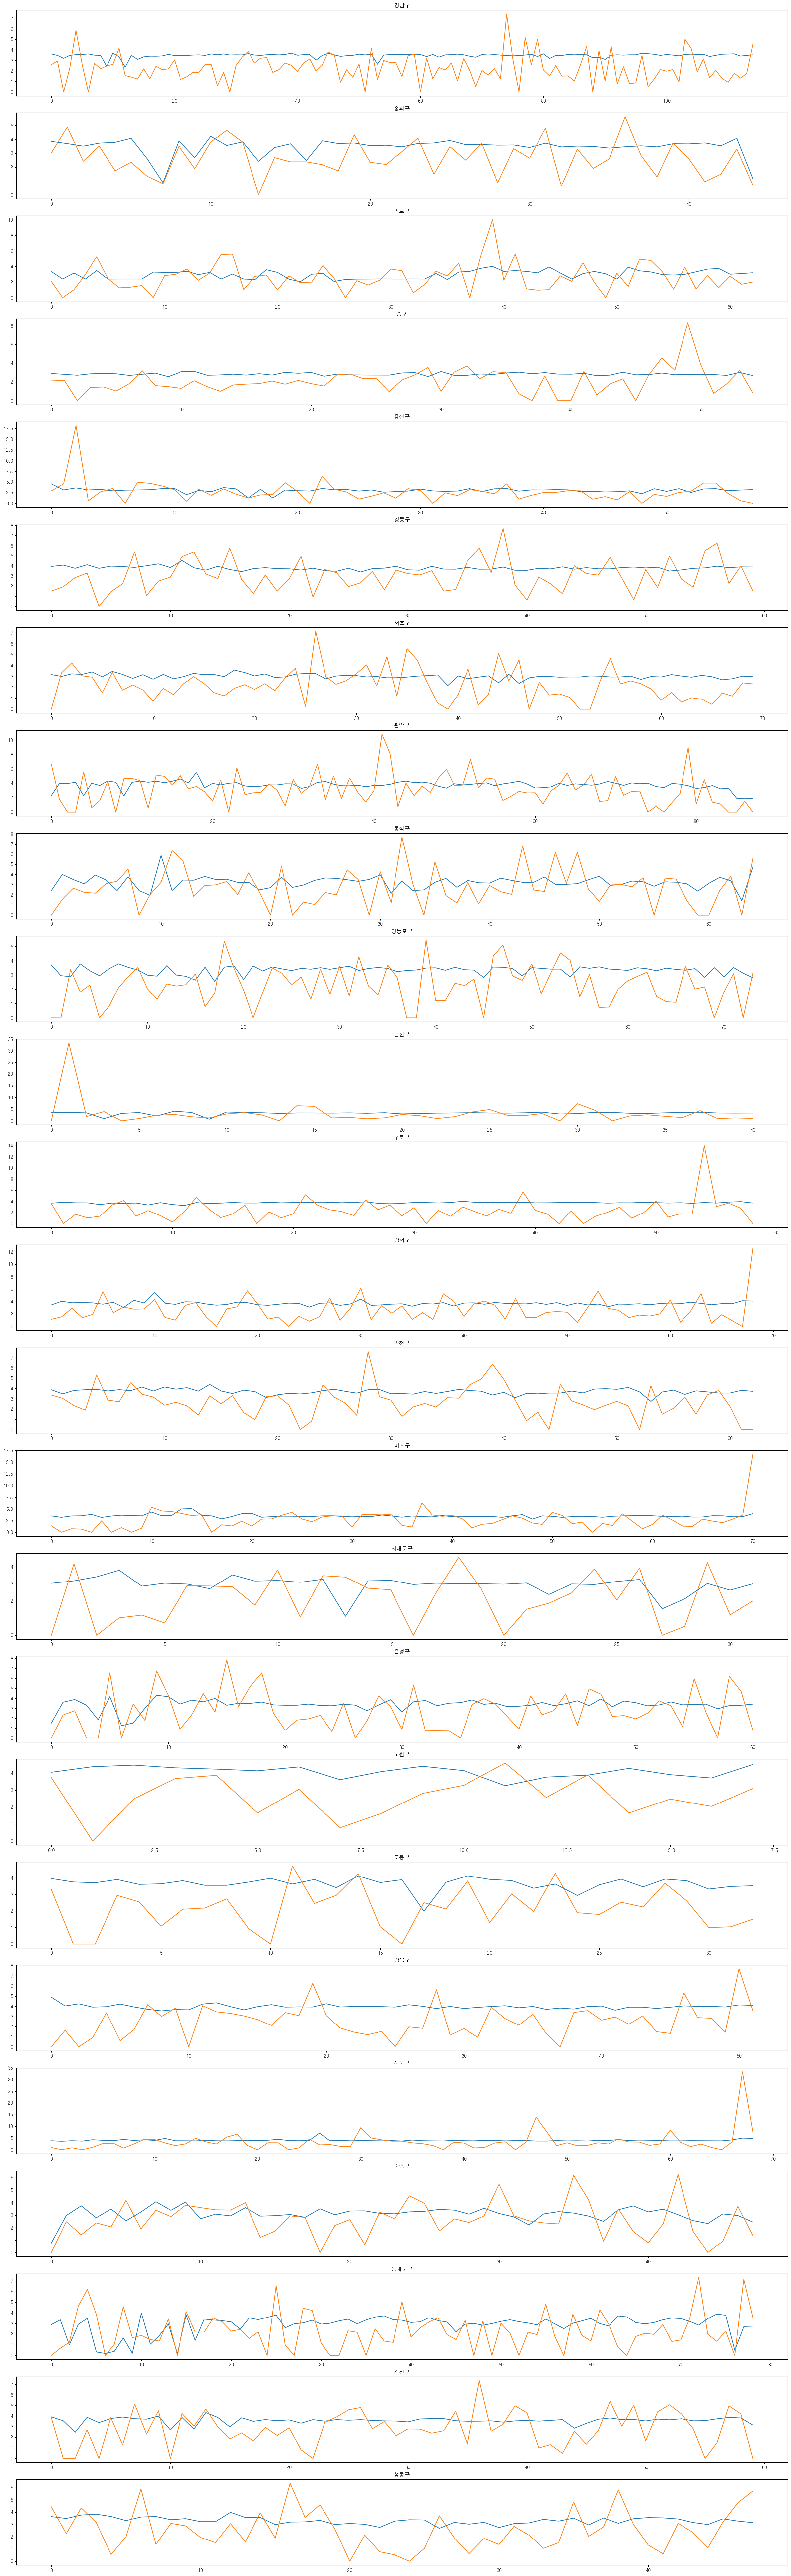

In [476]:
fig, ax = plt.subplots(nrows=25, figsize=(30,100))

for i in range(1,26):
    ax[i-1].set_title(name_list[i-1])
    model = globals()['model_{}'.format(i)]
    x_test = globals()['X_test_{}'.format(i)]
    y_test = globals()['y_test_{}'.format(i)]
    f = globals()['features_{}'.format(i)]
    y_pred = list(model.predict(x_test[f]))
    sns.lineplot([i for i in range(len(y_pred))], list(y_pred), ax = ax[i-1])
    sns.lineplot([i for i in range(len(y_pred))], list(y_test), ax = ax[i-1])
                      